# Customer Churn Prediction Using Machine Learning
## *Building a Model to Detect Churn in a Telco Company*
## ________________________________________________________

# Business Context

> What is customer churn (or customer attrition) ?
- Customers who stop subscribing to services provided by the company.

> Why do we care about customer churn?
- Acquring a new customer is costly. So, we cannot afford to lose customers. 
- If we are able to retain a large portion of the existing customers, we can maintain business values.

> Why machine learning?
- To prevent customer churning, we need to implement retaining strategies for the customers who are mostly to churn.
- the ability to `predict churns in advance` will give us some times to apply counter measures. 

# Machine Learning Pipeline:
## 1. Data Preparation
## 2. Exploratory Data Analysis (EDA)
## 3. Preprocessing
## 4. Model Training and Evaluation
## ___________________________________

In [48]:
import pandas as pd
import numpy as np
import tkinter
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict, GridSearchCV
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
sns.set(style='whitegrid')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

> Import Dataset

In [49]:
data =  pd.read_excel('Merged_Data.xlsx')

# 1. Data Preparation

In [50]:
data.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Tenure Months,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Quarter,Satisfaction Score,Customer Status,Churn Category
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,1,No,0,27,3964,NaN,Q3,3,Joined,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,34,No,0,61,3441,NaN,Q3,3,Stayed,NaN
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,2,Yes,1,86,3239,Competitor made better offer,Q3,1,Churned,Competitor
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,45,No,0,66,4307,NaN,Q3,3,Stayed,NaN
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,2,Yes,1,67,2701,Moved,Q3,2,Churned,Other


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LoyaltyID           7043 non-null   int64  
 1   Customer ID         7043 non-null   object 
 2   Senior Citizen      7043 non-null   object 
 3   Partner             7043 non-null   object 
 4   Dependents          7043 non-null   object 
 5   Tenure              7043 non-null   int64  
 6   Phone Service       7043 non-null   object 
 7   Multiple Lines      7043 non-null   object 
 8   Internet Service    7043 non-null   object 
 9   Online Security     7043 non-null   object 
 10  Online Backup       7043 non-null   object 
 11  Device Protection   7043 non-null   object 
 12  Tech Support        7043 non-null   object 
 13  Streaming TV        7043 non-null   object 
 14  Streaming Movies    7043 non-null   object 
 15  Contract            7043 non-null   object 
 16  Paperl

In [52]:
#Check numeric and non-numeric columns
cat_df = data.select_dtypes(include=['object'])
num_df = data.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
Customer ID
Senior Citizen
Partner
Dependents
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Paperless Billing
Payment Method
Total Charges
Churn
CustomerID
Country
State
City
Lat Long
Gender
Churn Label
Churn Reason
Quarter
Customer Status
Churn Category

Numeric columns:
LoyaltyID
Tenure
Monthly Charges
Count
Zip Code
Latitude
Longitude
Tenure Months
Churn Value
Churn Score
CLTV
Satisfaction Score


In [53]:
#Find % of missing data in each column
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}'.format(col, pct_missing))

LoyaltyID - 0.0
Customer ID - 0.0
Senior Citizen - 0.0
Partner - 0.0
Dependents - 0.0
Tenure - 0.0
Phone Service - 0.0
Multiple Lines - 0.0
Internet Service - 0.0
Online Security - 0.0
Online Backup - 0.0
Device Protection - 0.0
Tech Support - 0.0
Streaming TV - 0.0
Streaming Movies - 0.0
Contract - 0.0
Paperless Billing - 0.0
Payment Method - 0.0
Monthly Charges - 0.0
Total Charges - 0.0
Churn - 0.0
CustomerID - 0.0
Count - 0.0
Country - 0.0
State - 0.0
City - 0.0
Zip Code - 0.0
Lat Long - 0.0
Latitude - 0.0
Longitude - 0.0
Gender - 0.0
Tenure Months - 0.0
Churn Label - 0.0
Churn Value - 0.0
Churn Score - 0.0
CLTV - 0.0
Churn Reason - 0.7346301292063041
Quarter - 0.0
Satisfaction Score - 0.0
Customer Status - 0.0
Churn Category - 0.7346301292063041


## Problems:

> `Missing values` in 'Churn Reason'

> Some features with `incorrect data types`

In [54]:
# Drop columns from data
colsToDrop = ['Tenure Months', 'Count', 'Churn Label', 
              'LoyaltyID', 'Zip Code', 'State', 'Lat Long',
              'Latitude', 'Longitude', 'Quarter', 'Country', 'Churn Category',
              'City', 'Customer Status']
data.drop(colsToDrop, axis=1, inplace=True)

> Fill missing values in 'Churn Reason'. There were missing values because the customers who are not churners will not have churn reasons.

In [55]:
#Fill null values in 'Churn Category' and 'Churn Reason' columns
data['Churn Reason'] = data['Churn Reason'].fillna('Not Churned')

## Covert features into their correct data types

In [56]:
#Convert 'Contract' column to category type
data['Contract'] = data['Contract'].astype('category')
data['Payment Method'] = data['Payment Method'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Churn Reason'] = data['Churn Reason'].astype('category')

> Set order of categories to 'Contract'

In [57]:
data['Contract'] = data['Contract'].cat.set_categories(
                                new_categories=['Month-to-month', 'One year', 'Two year'],
                                ordered=True)

> Since there are white spaces in the 'Total Charges' col, isnull() function will not consider them as missing values. White space is in 'obj' type as it is of string family.

- To change the data type of this feature, to_numeric() is applied by passing coerce in the 'error' parameter.

In [58]:
#Convert str to flaot
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

> 11 missing values found after coverting 'Total Charges' to numeric  

In [59]:
data['Total Charges'].isnull().sum()

11

> Drop those 11 observations

In [60]:
#Drop rows that have missing values in 'Total Charges' column because the missing values account only 0.15% of the data
data.dropna(inplace=True)

# Reset index
data.reset_index(drop=True, inplace=True)

> A new col called 'Churn Category' is created from 'Churn Reason' col to summarize the main causes of churners:
- Attitude
- Competitor
- Dissatisfaction
- Price
- Not Churned


In [61]:
# Create a new 'Churn Category'
values = ['Attitude', 'Competitor', 'Dissatisfaction', 'Price', 'Not Churned']
conditions = list(map(data['Churn Reason'].str.contains, values))

data['Churn Category'] = np.select(conditions, values, 'Other')

# 2. EDA

## Customer Attributes

> The occurence of churns mostly happened among those who are:
- not senior citizens
- no partners
- no dependents

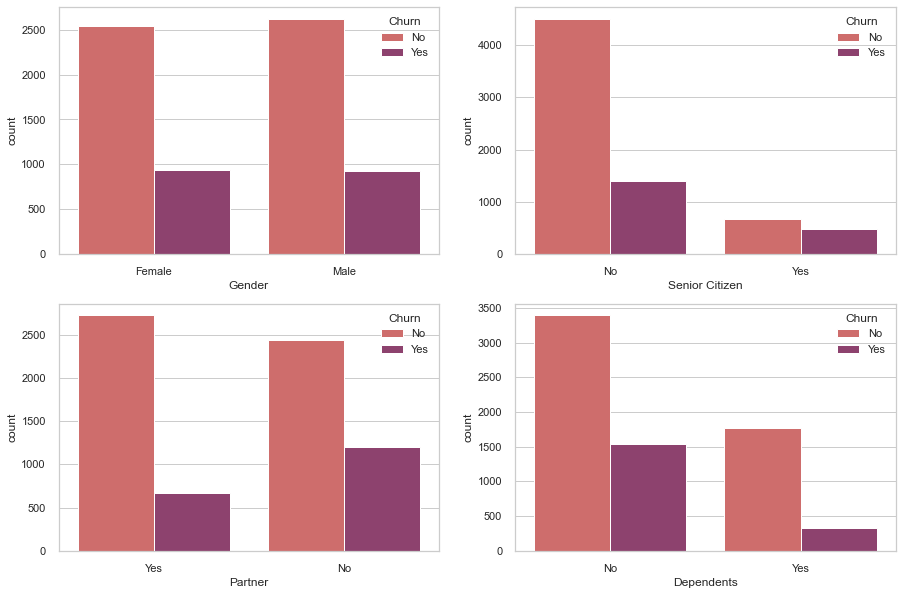

In [62]:
feature = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
plt.figure(figsize=(15,10))
plt.tight_layout()
for i in enumerate(feature):
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(i[1], hue='Churn', data = data, palette='flare')

## Service Subscriptions

> High number of churners in services:
- Subcribe to a `home phone` service
- Internet services:
    - Use `fiber optic` as Internet service
    - Don't use additional Internet support services such as `device protection plan` for internet equipment, `online security`, `tech support` and `online backup`
- Entertainment services:
    - Equal churn rate between those who use and do not use `streaming TV` and `streaming movies` services
- Subcribe to `paperless billing`

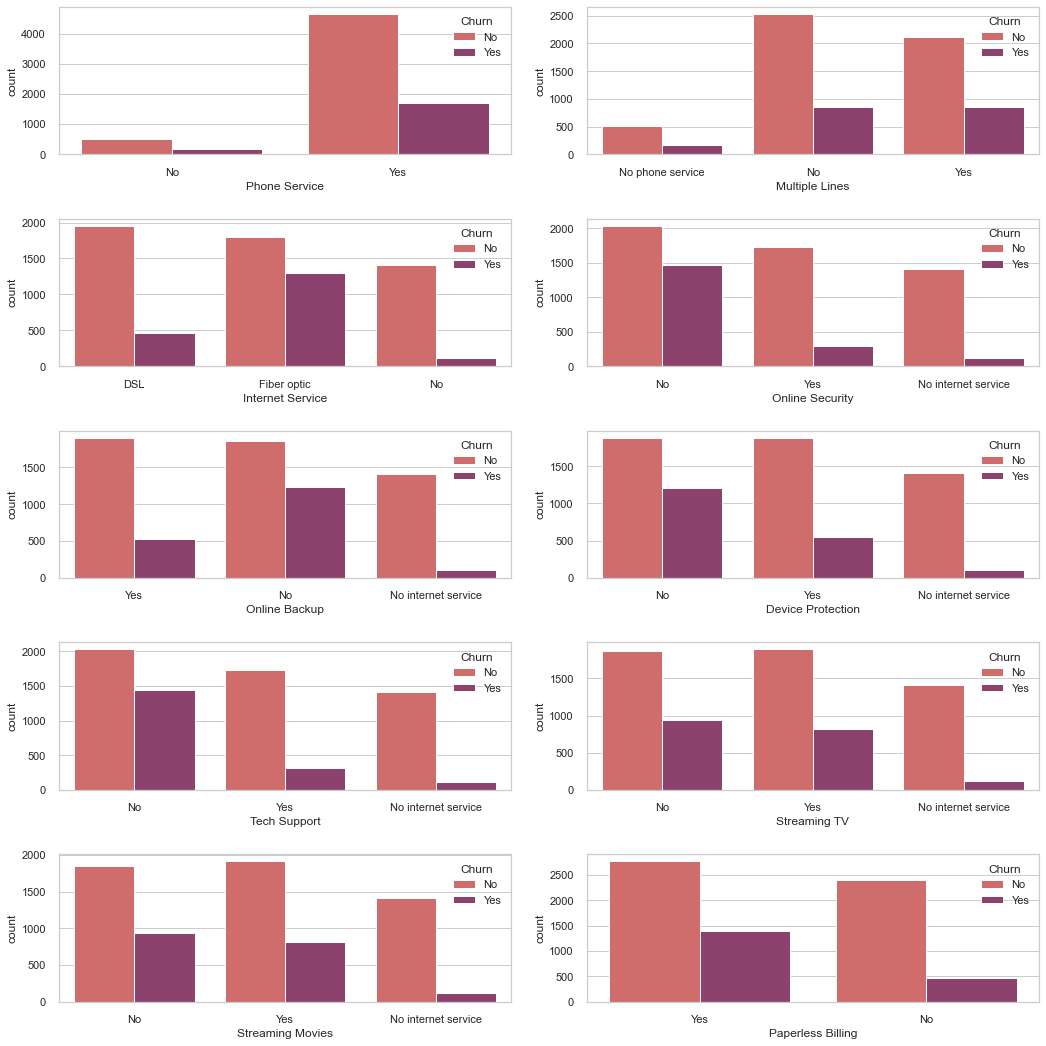

In [63]:
feature = ['Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Paperless Billing']
plt.figure(figsize=(15,15))
for i in enumerate(feature):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(i[1], hue='Churn', data = data, palette='flare')
plt.tight_layout(pad=2)

## Continous Features

> 50% of the churners had stayed with the company for `less than 10 months`.

> On a monthly basis, churners spent more than non-churners.

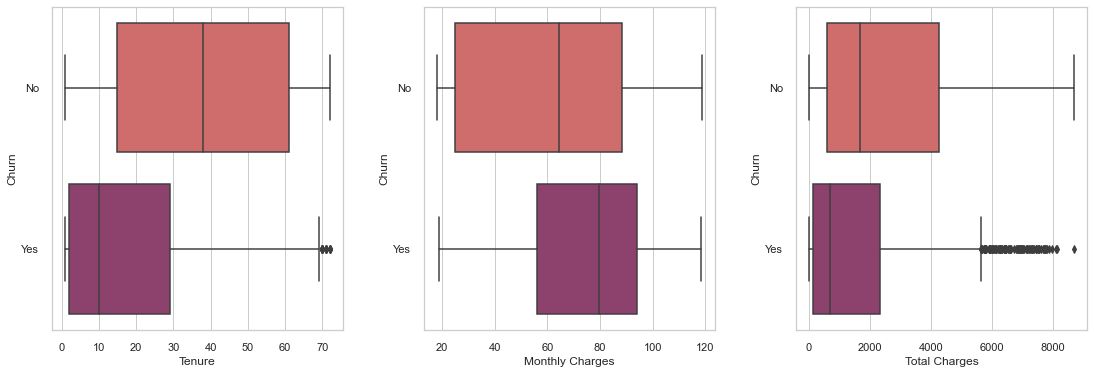

In [64]:
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Tenure', palette='flare', y='Churn')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Monthly Charges', palette='flare', y='Churn')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Total Charges', palette='flare', y='Churn')
plt.tight_layout(pad=3)

## Others

> Other features of the churners:
- Most of the churners went to the `competitor` side.
- `attiude` is also one of the factors that made them leave.
- Mostly were `month-to-month` users.
- A lot of them used `eletronic check` as a payment method

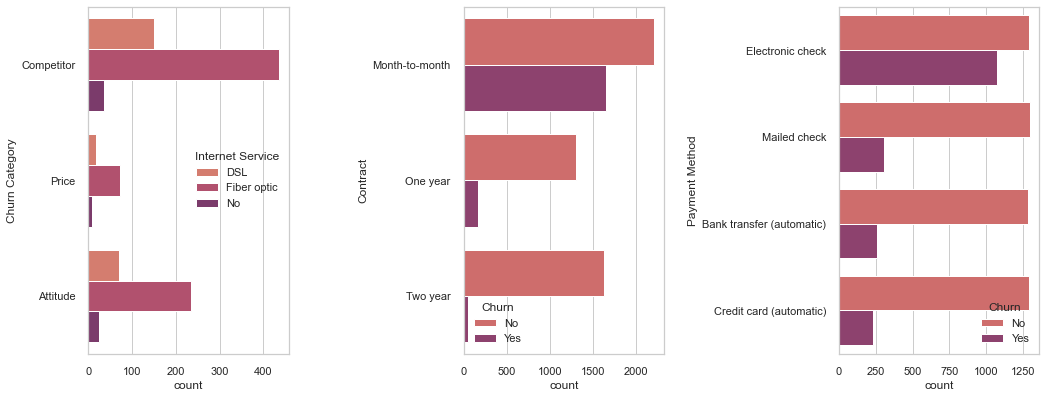

In [65]:
a = (data['Churn Category'] != 'Not Churned') & (data['Churn Category'] != 'Other')
b = data[a]

plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
sns.countplot(y='Churn Category', data=b, palette='flare', hue='Internet Service')

plt.subplot(1, 3, 2)
sns.countplot(y='Contract', hue='Churn', data=data, palette='flare')

plt.subplot(1, 3, 3)
sns.countplot(y='Payment Method', hue='Churn', data=data, palette='flare',
              order=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

plt.tight_layout(pad=2)

> Slightly Imbalanced Classed

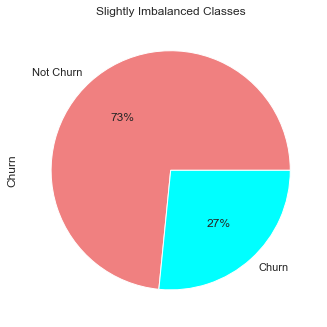

In [66]:
data['Churn'].value_counts().plot(
    kind='pie', y='', autopct='%1.0f%%',
    colors=['lightcoral', 'cyan'], labels=['Not Churn', 'Churn'],
    title='Slightly Imbalanced Classes')
plt.show()

# 3. Preprocessing

> Make a new copy of dataset

In [67]:
data_1 = data.copy()

> Drop features which are not predictors

In [68]:
colsToDrop = ['Customer ID', 'CustomerID', 'Churn Reason', 'Churn Score', 'Churn Value',
              'CLTV', 'Satisfaction Score', 'Churn Category']

data_1.drop(colsToDrop, axis=1, inplace=True)

> Encode categorical features with 'Yes/No' values using a function

In [69]:
#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
data_1['Churn'] = data_1[['Churn']].apply(binary_map)

#Encoding other binary category
binary_list = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
data_1[binary_list] = data_1[binary_list].apply(binary_map)

> Encoding gender category

In [70]:
# Encoding gender category
data_1['Gender'] = data_1['Gender'].map({'Male':1, 'Female':0})

> Encoding orninal variable

In [71]:
mapper = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
data_1['Contract'] = data_1['Contract'].replace(mapper)

> Encoding the other categoric features with more than two categories

In [72]:
data_1 = pd.get_dummies(data_1, drop_first=True)

## Drop highly correlated features

In [73]:
pr_data = data_1.copy()

> To ensure two or more than two independent variables are highly corrlated (`Absence of Multicollinearity`)
- Use `Variance Inflation Factor` or `VIF` to identify any significant multi-collinearity
    - value below 5 or 10 = small collinearity

In [74]:
#Drop columns
colsToDrop = ['Internet Service_No', 'Online Security_No internet service',
              'Online Backup_No internet service', 'Device Protection_No internet service', 'Tech Support_No internet service',
              'Streaming TV_No internet service', 'Phone Service', 'Total Charges', 'Monthly Charges']

pr_data.drop(colsToDrop, axis=1, inplace=True)

In [75]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(pr_data.loc[:, pr_data.columns != 'Churn'])

,variables,VIF
0,Senior Citizen,1.364234
1,Partner,2.815452
2,Dependents,1.960723
3,Tenure,7.621072
4,Contract,10.770721
5,Paperless Billing,2.674922
6,Multiple Lines_No phone service,1.389751
7,Multiple Lines_Yes,2.432847
8,Internet Service_Fiber optic,3.127848
9,Online Security_Yes,1.934224


## Separate the dataset between predictors and target 

In [76]:
# select independent variables
X = pr_data.drop(columns='Churn')

# select dependent variables
y = pr_data.loc[:, 'Churn']

# prove that the variables were selected correctly
#print(X.columns)

# prove that the variables were selected correctly
#print(y.name)

# 4. Model Evaluation

> Instantiate Stratified Kfold (5 K)

In [77]:
skf = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

> Use `Cross Validation` to compare and train different models with `default parameters`.

> A pipeline is created to include two steps to loop through StandardScaler() and each algorithm.

> After training the data with the selected algorithms, the one that has highest ROC-AUC score will be used as a baseline model.

In [78]:
model_names = ['Logistic Regression', 'Random Forest', 
         'Decision Tree', 'Naive Bayes', 'SVC']

classifiers = [
    LogisticRegression(random_state=1),
    RandomForestClassifier(random_state=1),
    DecisionTreeClassifier(random_state=1),
    GaussianNB(),
    SVC(probability=True, random_state=1)
    ]

model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(model_names, classifiers):
    # Define pipelines
    steps = list()
    steps.append(('scaler', StandardScaler()))
    steps.append(('model', clf))
    pl = Pipeline(steps=steps)
    
    # Evaluate models using cross validation and add the result to dataframe
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Accuracy'] = cross_val_score(pl, X, y, scoring='accuracy', cv = skf).mean()
    df.loc[index,'Precision'] = cross_val_score(pl, X, y, scoring='precision', cv = skf).mean()
    df.loc[index,'Recall'] = cross_val_score(pl, X, y, scoring='recall', cv = skf).mean()
    df.loc[index,'F1 Score'] = cross_val_score(pl, X, y, scoring='f1', cv = skf).mean()
    df.loc[index, 'ROC-AUC'] = cross_val_score(pl, X, y, scoring='roc_auc', cv = skf).mean()
    index+=1

In [79]:
df.sort_values(by='ROC-AUC', ascending=False)

,Classifiers,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.802901,0.655516,0.545209,0.595229,0.843510
3,Naive Bayes,0.759953,0.534689,0.747466,0.623370,0.828348
1,Random Forest,0.785549,0.627518,0.476191,0.541217,0.811795
4,SVC,0.793089,0.650896,0.478331,0.551381,0.798880
2,Decision Tree,0.724686,0.482557,0.492241,0.487119,0.662914


## Selecting the model that has the highest ROC-AUC score

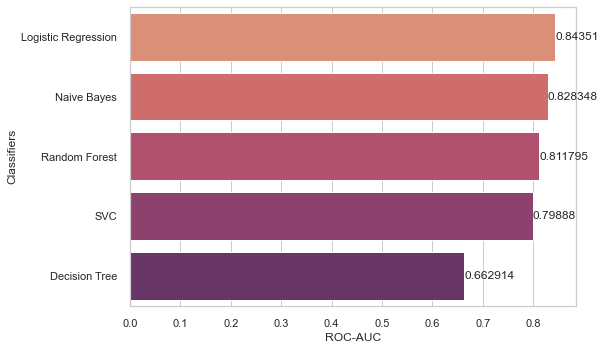

In [80]:
ax = sns.barplot(x='ROC-AUC', y='Classifiers', data=df, palette='flare'
            , order=df.sort_values(by='ROC-AUC', ascending=False).set_index('Classifiers').index)
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

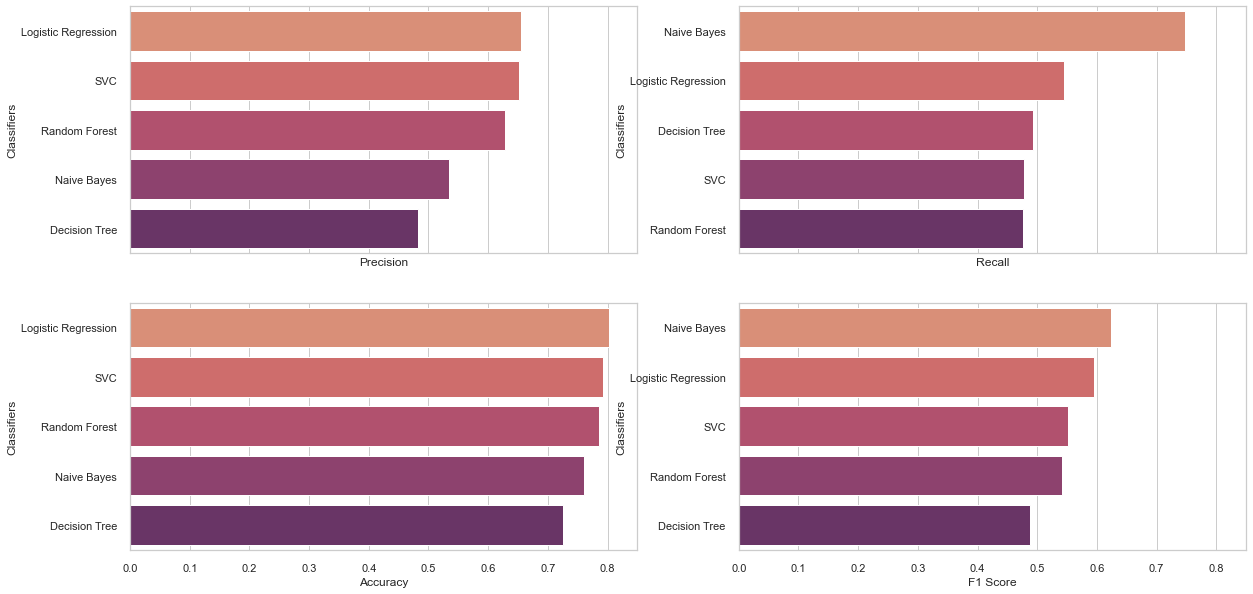

In [81]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(20,10))
custom_xlim = (0, .85)

plt.setp(ax, xlim = custom_xlim)

sns.barplot(x='Precision', y='Classifiers', data=df, palette='flare', order=df.sort_values(by='Precision', ascending=False).set_index('Classifiers').index, ax=ax[0, 0])

sns.barplot(x='Recall', y='Classifiers', data=df, palette='flare', order=df.sort_values(by='Recall', ascending=False).set_index('Classifiers').index, ax=ax[0, 1])

sns.barplot(x='Accuracy', y='Classifiers', data=df, palette='flare', order=df.sort_values(by='Accuracy', ascending=False).set_index('Classifiers').index, ax=ax[1, 0])

sns.barplot(x='F1 Score', y='Classifiers', data=df, palette='flare', order=df.sort_values(by='F1 Score', ascending=False).set_index('Classifiers').index, ax=ax[1, 1])

plt.show()

## Hyperparameter tuning

In [82]:
X1 = X.copy()
y1 = y.copy()

> When spliting the data using `train_test_split`, the `stratify` param. is used to ensure equal classes in each subset.

In [83]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42, stratify=y)

> Create parameter grid.

In [84]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

> Make a pipeline to include `StandardScaler()` and `GridSearchCV()`

In [85]:
pipe_LR = make_pipeline(StandardScaler(),
                        GridSearchCV(LogisticRegression(random_state=1),
                                     param_grid=param_grid,
                                     cv = 5,
                                     verbose=True,
                                     n_jobs=-1,
                                     refit=True)
)

> Fit pipeline

In [86]:
gridresult = pipe_LR.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


> Get best estimator

In [87]:
gridresult.named_steps['gridsearchcv'].best_estimator_

LogisticRegression(C=0.08858667904100823, penalty='l1', random_state=1,
                   solver='saga')

> Show best params

In [88]:
gridresult.named_steps['gridsearchcv'].best_params_

{'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

> Get predictions

In [89]:
y_pred = gridresult.predict(X_test)

> Create a dataframe to show metrics

In [90]:
# New LR
New_LR_acc = gridresult.score(X_test, y_test)
New_LR_pre = precision_score(y_test, y_pred)
New_LR_rec = recall_score(y_test, y_pred)
New_LR_f1 = f1_score(y_test, y_pred)
New_LR_roc_auc = roc_auc_score(y_test, y_pred)

# dictionary of lists 
dict = {'Classifiers': 'New Logistic Regression', 'Accuracy': New_LR_acc, 'Precision': New_LR_pre, 'Recall': New_LR_rec , 'F1 Score': New_LR_f1, 'ROC-AUC': New_LR_roc_auc} 
    
df_New_LR = pd.DataFrame(dict, index=[0])
combined_df = pd.concat([df, df_New_LR], ignore_index=True)
filter = combined_df[0:6:5]
filter

,Classifiers,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.802901,0.655516,0.545209,0.595229,0.84351
5,New Logistic Regression,0.804549,0.651376,0.569519,0.607703,0.72958


## Compare the Tuning Results

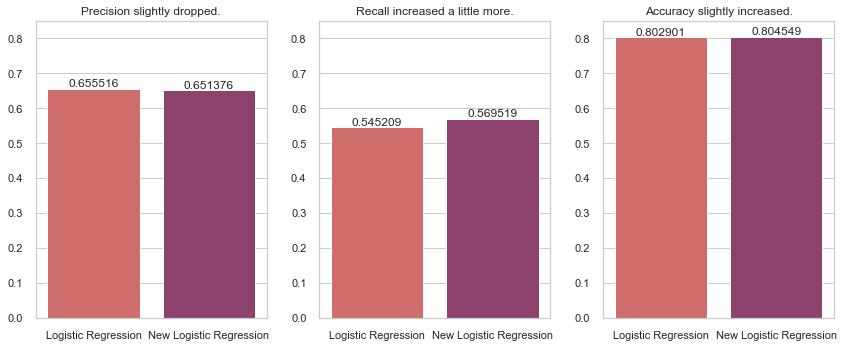

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)

ax = sns.barplot(y='Precision', x='Classifiers', data=filter, palette='flare')
plt.title('Precision slightly dropped.')
ax.set(xlabel=None)
ax.set(ylabel=None)  
ax.set_ylim(0, .85)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1, 3, 2)
ax = sns.barplot(y='Recall', x='Classifiers', data=filter, palette='flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Recall increased a little more.')
ax.set(xlabel=None)
ax.set(ylabel=None)  
ax.set_ylim(0, .85)

plt.subplot(1, 3, 3)
ax = sns.barplot(y='Accuracy', x='Classifiers', data=filter, palette='flare')
plt.title('lol')
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel=None) 
plt.title('Accuracy slightly increased.')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_ylim(0, .85)  

plt.tight_layout()
plt.show()

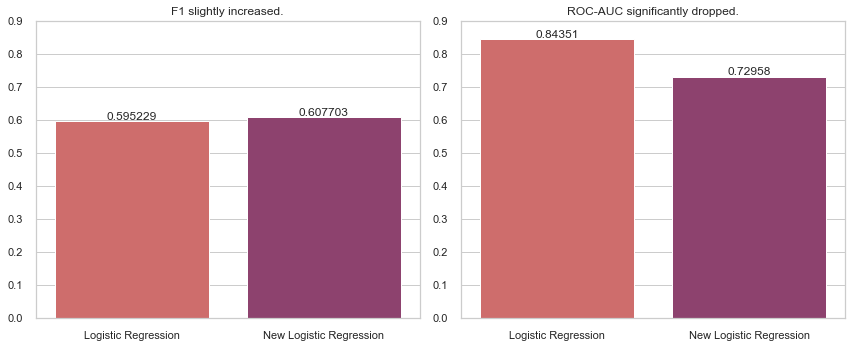

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

ax = sns.barplot(y='F1 Score', x='Classifiers', data=filter, palette='flare')
plt.title('F1 slightly increased.')
ax.set(xlabel=None)
ax.set(ylabel=None)  
ax.set_ylim(0, .9)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1, 2, 2)
ax = sns.barplot(y='ROC-AUC', x='Classifiers', data=filter, palette='flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('ROC-AUC significantly dropped.')
ax.set(xlabel=None)
ax.set(ylabel=None)  
ax.set_ylim(0, .9)


plt.tight_layout()
plt.show()

# Points to Consider 

> When to predict?
- Predict on a monthly basis so that we have enough time for implementing intervention measures for potential churners.

> Business areas to improve:
- Examine the differences of Internet service offers between the company and its competitors (speed, price, customer service support)

## ______________________________________________________________

In [ ]:
# Confusion Matrix

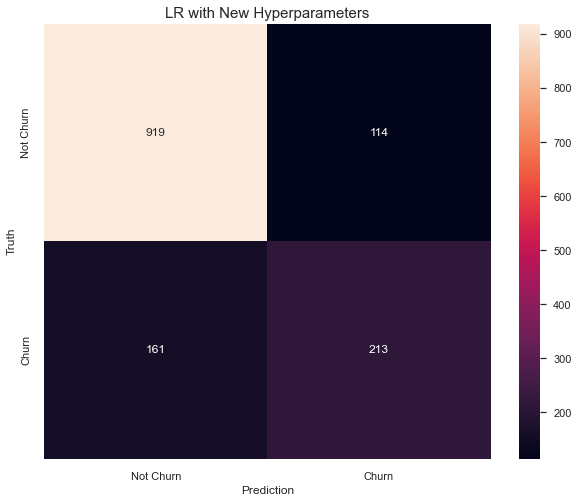

In [93]:
plt.figure(figsize=(10,8))
cm_LR = confusion_matrix(y_test, y_pred)
class_names = ['Not Churn', 'Churn']
df_cm = pd.DataFrame(cm_LR, index=class_names, columns=class_names)
#plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
plt.title('LR with New Hyperparameters', fontsize=15)
ax.set_ylabel('Truth')
ax.set_xlabel('Prediction')
#sns.set(font_scale=1)
plt.show()

In [94]:
'''fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,7))
fig.suptitle('After Hyperparameter Tuning')

#Old LR
cm_LR = confusion_matrix(y, cross_val_predict(model_New_LR, X, y, cv=skf))
class_names = ['Not Churn', 'Churn']
df_cm = pd.DataFrame(cm_LR, index=class_names, columns=class_names)
#plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d', ax=axes[0])
axes[0].set_title('LR with Default Hyperparameters')
axes[0].set_ylabel('Truth')
axes[0].set_xlabel('Prediction')

#New LR
cm_LR = confusion_matrix(y_test, y_pred)
class_names = ['Not Churn', 'Churn']
df_cm = pd.DataFrame(cm_LR, index=class_names, columns=class_names)
#plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d', ax=axes[1])
axes[1].set_title('LR with New Hyperparameters')
axes[1].set_ylabel('Truth')
axes[1].set_xlabel('Prediction')
plt.show()'''

"fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,7))\nfig.suptitle('After Hyperparameter Tuning')\n\n#Old LR\ncm_LR = confusion_matrix(y, cross_val_predict(model_New_LR, X, y, cv=skf))\nclass_names = ['Not Churn', 'Churn']\ndf_cm = pd.DataFrame(cm_LR, index=class_names, columns=class_names)\n#plt.figure(figsize = (10,7))\nsns.heatmap(df_cm, annot=True, fmt='d', ax=axes[0])\naxes[0].set_title('LR with Default Hyperparameters')\naxes[0].set_ylabel('Truth')\naxes[0].set_xlabel('Prediction')\n\n#New LR\ncm_LR = confusion_matrix(y_test, y_pred)\nclass_names = ['Not Churn', 'Churn']\ndf_cm = pd.DataFrame(cm_LR, index=class_names, columns=class_names)\n#plt.figure(figsize = (10,7))\nsns.heatmap(df_cm, annot=True, fmt='d', ax=axes[1])\naxes[1].set_title('LR with New Hyperparameters')\naxes[1].set_ylabel('Truth')\naxes[1].set_xlabel('Prediction')\nplt.show()"